In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

path = "다운로드.jpg"

image = np.array(Image.open(path).convert("RGB").resize((256, 256)))
image_r, image_g, image_b = image[:,:,0], image[:,:,1], image[:,:,2]
image_s = np.stack([image_r, image_g, image_b], -1)
image_r, image_g, image_b = np.diag(image_r), np.diag(image_g), np.diag(image_b)

# image = plt.imshow(image)
# plt.show()

# image_s = plt.imshow(image_s)
# plt.show()

In [ ]:
import os
os.listdir()

In [12]:
import cv2
import math
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm

video_legal_dir = r"D:\Video-Dataset\Youtube_collect\train\Legal"
video_illegal_dir = r"C:\Users\VIP444\Desktop\예시 데이터\workers"

def extract_diagnoal_matrix(dir_path : str):
    video_paths = glob.glob(dir_path + "\*")
    print(video_paths)
    video_diagonals = []

    for video_path in tqdm(video_paths, total=len(video_paths), desc="Extract Features"):
        vidcap = cv2.VideoCapture(video_path)
        vid_total_frames_num = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)
        vid_frame_per_s = int(vidcap.get(cv2.CAP_PROP_FPS))

        sections, retstep = np.linspace(1, 9000, 256, retstep=True)
        sections = list(map(math.floor, sections))
        frame_diagonals = []

        while(vidcap.isOpened()):
            ret, frame = vidcap.read()
            
            if not ret:
                break
            
            if int(vidcap.get(cv2.CAP_PROP_POS_FRAMES)) in sections:
                # frame = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
                frame = cv2.resize(frame, (256, 256))

                frame_r, frame_g, frame_b = frame[:,:,0], frame[:,:,1], frame[:,:,2]
                frame_r, frame_g, frame_b = np.diag(frame_r), np.diag(frame_g), np.diag(frame_b)
                
                frame_diagonal = np.stack([frame_r, frame_g, frame_b], -1)
                frame_diagonal = np.expand_dims(frame_diagonal, 1)

                frame_diagonals.append(frame_diagonal)
        
        vidcap.release()
        video_diagonal = np.concatenate(frame_diagonals, axis=1)
        video_diagonals.append(video_diagonal)
    
    return video_diagonals

# legal_diagonals = extract_diagnoal_matrix(video_legal_dir)
illegal_diagonals = extract_diagnoal_matrix(video_illegal_dir)

['C:\\Users\\VIP444\\Desktop\\예시 데이터\\workers\\[4K HDR] Night Walk Seoul Sinchon Street Busking with Kpop Tour Korea.mp4', 'C:\\Users\\VIP444\\Desktop\\예시 데이터\\workers\\[4K HDR] Snowy Night Walk Around Ilsan Neighborhood Ambience Sounds ☂️❄️ASMR.mp4', 'C:\\Users\\VIP444\\Desktop\\예시 데이터\\workers\\[4K] Walking along Busan Gwangalli Beach in the summer rainy season 긴 여름장마속의 부산 광안리해수욕장 걷기.mp4', 'C:\\Users\\VIP444\\Desktop\\예시 데이터\\workers\\【4K】Seoul Afternoon Walk 🇰🇷  Gangnam  💕평일 강남 오후 모습💕  서울랜선투어 🚶🚶\u200d♂️🚶\u200d♀️.mp4']


Extract Features: 100%|██████████| 4/4 [07:39<00:00, 114.94s/it]


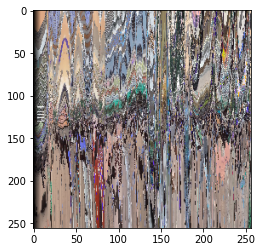

In [16]:
plt.imshow(illegal_diagonals[3])
plt.show()

# plt.imshow(legal_diagonals[2])
# plt.show()

In [ ]:
test = np.concatenate(frame_diagonals, axis=1)
print(test.shape)
plt.imshow(test)
plt.show()
test.resize(256,256,3)
print(test.shape)

plt.imshow(test)
plt.show()

In [ ]:
(256, 256, 3)